In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, r2_score
import graphviz

data = pd.read_csv('../data/Sleep_Efficiency.csv') 
data = data.dropna()

data['Smoking status'] = data['Smoking status'].replace({'Yes': 1, 'No': 0})
feature_names = ['Caffeine consumption','Alcohol consumption', 'Smoking status', 'Exercise frequency']
X = data[feature_names]  # features
y = data['Sleep duration']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

regressor = DecisionTreeRegressor(max_depth=3)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8212597590884891


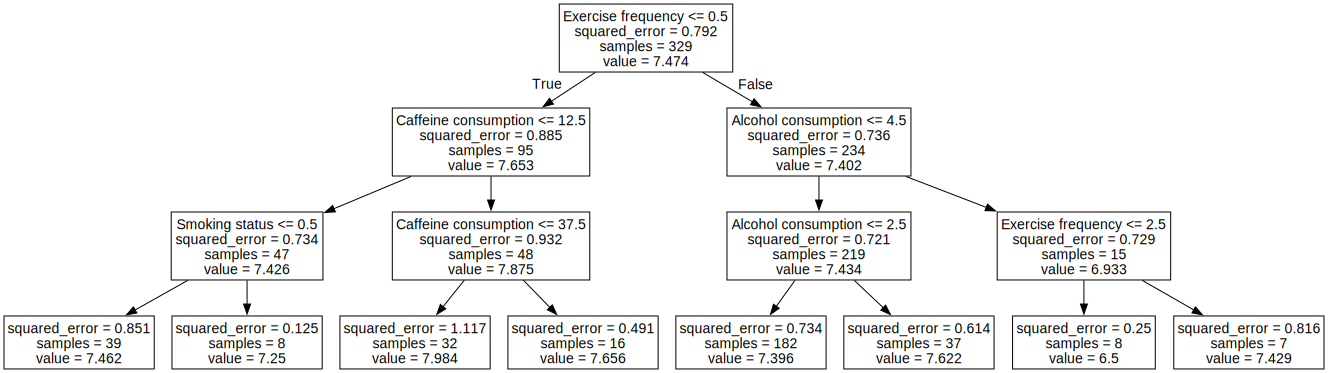

In [5]:
export_graphviz(regressor, out_file="tree.dot", feature_names=feature_names)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)